In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

# Importación de datos

In [2]:
df_data = pd.read_csv('../../data/final/data.csv', index_col=0)

In [3]:
df_data.head()

,Country Name,1995_death,1996_death,1997_death,1998_death,1999_death,2000_death,2001_death,2002_death,2003_death,...,2008_pib,2009_pib,2010_pib,2011_pib,2012_pib,2013_pib,2014_pib,2015_pib,2016_pib,2017_pib
0,Argentina,663472,664675,541820,560360,579086,554296,571882,582380,603740,...,3.615580e+11,3.329765e+11,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575314e+11,6.436287e+11
1,Brazil,4427790,3635528,3614064,3716092,3754632,3785564,3845928,3931176,2004624,...,1.695825e+12,1.667020e+12,2.208872e+12,2.616201e+12,2.465189e+12,2.472807e+12,2.455994e+12,1.802214e+12,1.795700e+12,2.062831e+12
2,Brunei Darussalam,2796,2525,2697,2582,2766,2895,2991,2898,2901,...,1.439310e+10,1.073237e+10,1.370737e+10,1.852532e+10,1.904794e+10,1.809383e+10,1.709834e+10,1.293039e+10,1.140085e+10,1.212810e+10
3,Canada,653537,660572,669303,677740,681742,436124,439076,447206,452338,...,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.828689e+12,1.847209e+12,1.803533e+12,1.556130e+12,1.528243e+12,1.649878e+12
4,Colombia,427210,437252,341064,350726,367106,374552,382744,384148,379600,...,2.421870e+11,2.323978e+11,2.865631e+11,3.349439e+11,3.709213e+11,3.821161e+11,3.811121e+11,2.934817e+11,2.828250e+11,3.118837e+11


In [4]:
df_data.shape

(20, 71)

# Implementación de K-Means

In [5]:
# Extraemos las columnas que queremos utilizar para realizar el clustering
data_to_cluster = df_data.loc[:, df_data.columns[1:]].values

# Normalización los datos
scaler = StandardScaler()
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del codo para obtener la mejor k

In [6]:
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_data)
    
    inertia.append(kmeans.inertia_)

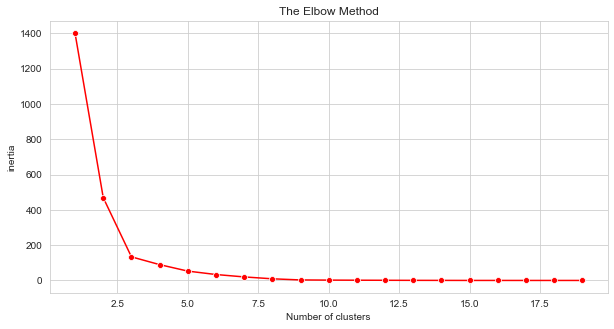

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, len(inertia)+1), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [8]:
# Creación del modelo con la mejor k obtenida
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [9]:
# Añadimos el nombre del país a cada registro y el cluster en el que se ha incluido
df_data['cluster'] = y_kmeans
df_data['country_name'] = df_data['Country Name']

In [10]:
# Mostramos cada uno de los clusters con los países asociados
for cluster in range(3):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster+1))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Argentina
 - Brunei Darussalam
 - Canada
 - Colombia
 - Croatia
 - Ecuador
 - Finland
 - Hungary
 - Israel
 - Kuwait
 - Nicaragua
 - Singapore
 - Slovenia
 - Spain
 - Sweden
Cluster 2
 - United States of America
Cluster 3
 - Brazil
 - Germany
 - Japan
 - Mexico
